In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import random
     
from keras.layers import Dropout
from keras.layers import Flatten

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

2024-06-02 17:42:48.152409: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path = 'Desktop/proyecto integrador/*'

In [3]:
#Data acquisition
noise = glob.glob("train/OK_500/*.png")

nonoise = glob.glob("train/NOK_500/*.png")

In [4]:
len(noise)

500

In [5]:
len(nonoise)

500

In [6]:
noise_Formated = []
nonoise_Formated = []

width = 400 
height = 250
dim = (width, height)

for i in noise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    noise_Formated.append(img_resized)

for i in nonoise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    nonoise_Formated.append(img_resized)

In [7]:
y_noise = np.ones(len(noise_Formated))
y_nonoise = np.zeros(len(nonoise_Formated))

In [8]:
X = np.vstack((noise_Formated,nonoise_Formated))
X.shape

(1000, 250, 400)

In [9]:
y = np.hstack((y_noise,y_nonoise))
y.shape

(1000,)

In [10]:
X=X/255

In [11]:
# 400 x 250 = 100,000
num_pixels = 100000
X = X.reshape(X.shape[0], num_pixels)
print(X.shape)

(1000, 100000)


In [12]:
model = Sequential()
model.add(Dense(units = 50, input_dim=num_pixels, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, input_dim=100000, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │     5,000,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,001,650 (19.08 MB)

 Trainable params: 5,001,650 (19.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
print(X.shape)
print(y.shape)
print(np.random.choice(y,10,replace=True))

(1000, 100000)
(1000,)
[1. 1. 0. 0. 0. 1. 0. 0. 1. 0.]


In [14]:
# 10% para el set de prueba
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state = 42)

In [15]:
# 10% para el set de validacion
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.1, stratify=y_tv, random_state = 42)

In [16]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=32, epochs=100, 
                 validation_data=(X_val, y_val), shuffle='true')

Epoch 1/100
26/26 - 8s - 293ms/step - accuracy: 0.5840 - loss: 0.6789 - val_accuracy: 0.6889 - val_loss: 0.6487
Epoch 2/100
26/26 - 3s - 114ms/step - accuracy: 0.6148 - loss: 0.6552 - val_accuracy: 0.6889 - val_loss: 0.6208
Epoch 3/100
26/26 - 3s - 117ms/step - accuracy: 0.6642 - loss: 0.6203 - val_accuracy: 0.6667 - val_loss: 0.5933
Epoch 4/100
26/26 - 3s - 112ms/step - accuracy: 0.6704 - loss: 0.6001 - val_accuracy: 0.6778 - val_loss: 0.5896
Epoch 5/100
26/26 - 3s - 97ms/step - accuracy: 0.6877 - loss: 0.5884 - val_accuracy: 0.7111 - val_loss: 0.5637
Epoch 6/100
26/26 - 3s - 113ms/step - accuracy: 0.7321 - loss: 0.5586 - val_accuracy: 0.7333 - val_loss: 0.5577
Epoch 7/100
26/26 - 3s - 99ms/step - accuracy: 0.7222 - loss: 0.5522 - val_accuracy: 0.7111 - val_loss: 0.5473
Epoch 8/100
26/26 - 2s - 86ms/step - accuracy: 0.7198 - loss: 0.5452 - val_accuracy: 0.7000 - val_loss: 0.5415
Epoch 9/100
26/26 - 2s - 87ms/step - accuracy: 0.7247 - loss: 0.5468 - val_accuracy: 0.7556 - val_loss: 0.5

Epoch 74/100
26/26 - 2s - 83ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9222 - val_loss: 0.3267
Epoch 75/100
26/26 - 2s - 83ms/step - accuracy: 0.9926 - loss: 0.0279 - val_accuracy: 0.9333 - val_loss: 0.3328
Epoch 76/100
26/26 - 3s - 107ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9333 - val_loss: 0.3132
Epoch 77/100
26/26 - 3s - 96ms/step - accuracy: 0.9889 - loss: 0.0333 - val_accuracy: 0.8889 - val_loss: 0.4550
Epoch 78/100
26/26 - 3s - 110ms/step - accuracy: 0.9864 - loss: 0.0435 - val_accuracy: 0.9333 - val_loss: 0.3308
Epoch 79/100
26/26 - 2s - 93ms/step - accuracy: 0.9864 - loss: 0.0413 - val_accuracy: 0.9111 - val_loss: 0.3973
Epoch 80/100
26/26 - 2s - 88ms/step - accuracy: 0.9370 - loss: 0.1971 - val_accuracy: 0.8667 - val_loss: 0.4471
Epoch 81/100
26/26 - 2s - 86ms/step - accuracy: 0.9642 - loss: 0.1178 - val_accuracy: 0.9000 - val_loss: 0.3436
Epoch 82/100
26/26 - 2s - 90ms/step - accuracy: 0.9852 - loss: 0.0577 - val_accuracy: 0.9222 - val_los

In [17]:
# resumen del model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │     5,000,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,004,952 (57.24 MB)

 Trainable params: 5,001,650 (19.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,003,302 (38.16 MB)

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - 24ms/step - accuracy: 0.9400 - loss: 0.2405


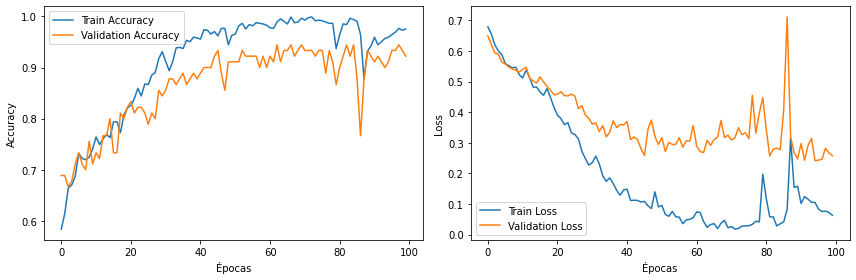

In [19]:
# Obtén los datos del historial
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']


# Gráfica de accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [20]:
y_proba_train = model.predict(X_train)
y_pred_train = y_proba_train.round().astype(int)
y_proba_validation = model.predict(X_val)
y_pred_validation = y_proba_validation.round().astype(int)
y_proba_test = model.predict(X_test)
y_pred_test = y_proba_test.round().astype(int)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [21]:
lbl = LabelEncoder()
target_names = ['class 0', 'class 1']
#Class 0 = NOK
#Class 1 = OK

In [22]:
!pip install -q scikit-plot
import scikitplot as skplt

In [23]:
print("Train sample \n", classification_report(y_train, y_pred_train,target_names = target_names))
print("Validation sample \n", classification_report(y_val, y_pred_validation,target_names = target_names))
print("Test sample \n", classification_report(y_test, y_pred_test,target_names = target_names))

Train sample 
               precision    recall  f1-score   support

     class 0       1.00      0.98      0.99       405
     class 1       0.98      1.00      0.99       405

    accuracy                           0.99       810
   macro avg       0.99      0.99      0.99       810
weighted avg       0.99      0.99      0.99       810

Validation sample 
               precision    recall  f1-score   support

     class 0       0.91      0.93      0.92        45
     class 1       0.93      0.91      0.92        45

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90

Test sample 
               precision    recall  f1-score   support

     class 0       0.94      0.94      0.94        50
     class 1       0.94      0.94      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94  

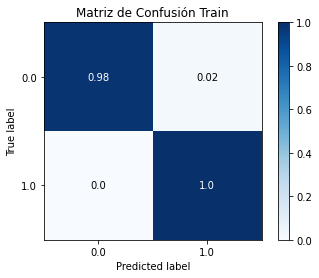

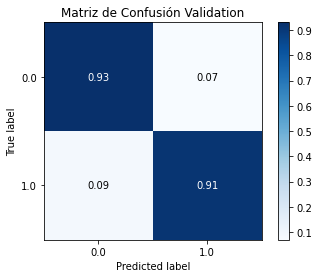

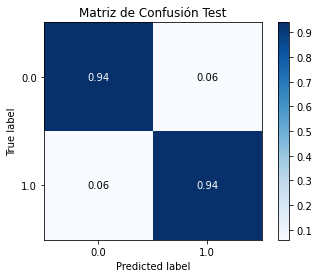

In [24]:
# Gráfico de Matriz de Confusión
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_val, y_pred_validation, normalize=True)
plt.title('Matriz de Confusión Validation')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.title('Matriz de Confusión Test')

plt.show() 

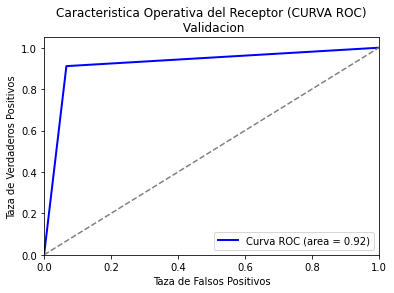

In [25]:
#taza de verdaderos positivos y taza de falsos positivos 
fpr, tpr, thresholds =  roc_curve(y_val, y_pred_validation)

#AUC 
auc = roc_auc_score(y_val, y_pred_validation)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taza de Falsos Positivos')
plt.ylabel('Taza de Verdaderos Positivos')
plt.title('Caracteristica Operativa del Receptor (CURVA ROC)\n Validacion')

plt.legend(loc="lower right")
plt.show()

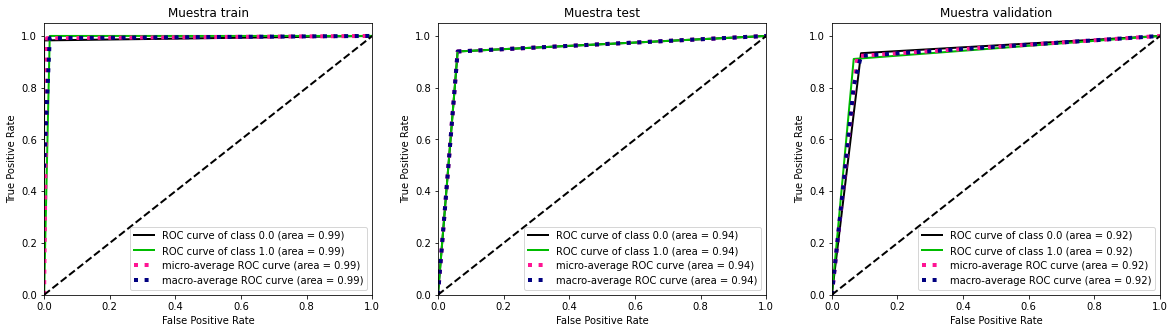

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

skplt.metrics.plot_roc(y_train, np.column_stack((1-y_pred_train, y_pred_train)), ax=axes[0])
axes[0].set_title("Muestra train")

skplt.metrics.plot_roc(y_test, np.column_stack((1-y_pred_test, y_pred_test)), ax=axes[1])
axes[1].set_title("Muestra test")

skplt.metrics.plot_roc(y_val, np.column_stack((1-y_pred_validation, y_pred_validation)), ax=axes[2])
axes[2].set_title("Muestra validation")
axes[2].legend(loc="lower right")

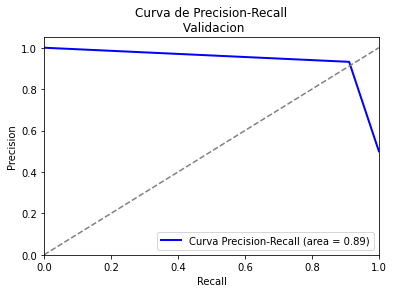

In [28]:
#calcular la curva pr
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_validation)

auc_pr = average_precision_score(y_val, y_pred_validation)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Curva Precision-Recall (area = {auc_pr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precision-Recall\n Validacion')

plt.legend(loc="lower right")
plt.show()

In [ ]:
#guardar archivo de modelo ya entrenado
target_dir = './modelo_keras_noise4/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
model.save('./modelo_keras_noise4/modelo_keras_noise4.keras')
model.save_weights('./modelo_keras_noise4/pesos.weights.h5')